In [1]:
# Importing required libraries for the project
import sys # for python library version
import numpy as np # for scientific computing
import pandas as pd # for data anaysis
import matplotlib # for visualization
import seaborn as sns # for visualization
import sklearn # ML Library

In [2]:
# importing the dataset to a variable
data = pd.read_csv("K:/CIC-2017-dataset/CIC-IDS-2017/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")

# displaying first 3 observations
data.head(3)

H:\anacondaa\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
# grouping by forest cover type and calculating total occurance
data.groupby(' Label').size()

 Label
BENIGN              440031
DoS GoldenEye        10293
DoS Hulk            231073
DoS Slowhttptest      5499
DoS slowloris         5796
Heartbleed              11
dtype: int64

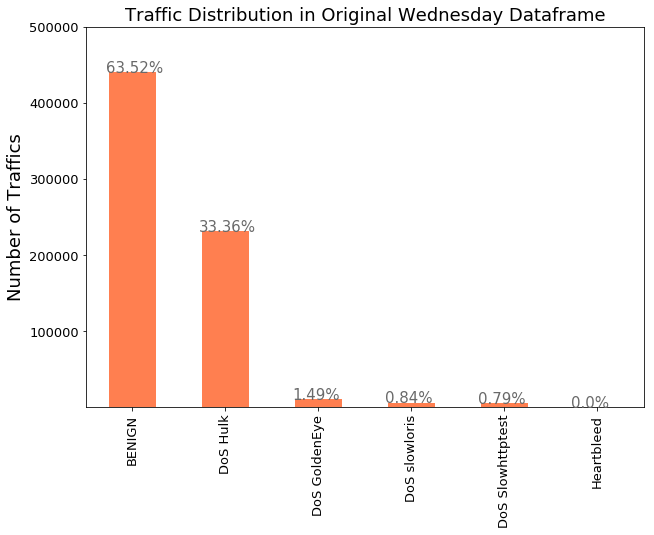

In [4]:
ax = data[' Label'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Traffic Distribution in Original Wednesday Dataframe", fontsize=18)
ax.set_ylabel("Number of Traffics", fontsize=18);
ax.set_yticks([100000, 200000, 300000, 400000, 500000])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')